Create surrogate neural population responses during natural behavior trials using reduced populations with parameters chosen based on theoretical considerations.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal, stats
import sys
import warnings; warnings.filterwarnings("ignore")

from aux import get_seg
from disp import set_plot
from my_torch import skl_fit_ridge
from my_stats import nanpearsonr

from record_0_main import smlt_ma

cc = np.concatenate

FPS = 30.03  # sampling rate of behavioral data
DT = 1/FPS

STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

PTRAIN = .8
NSPLIT = 30

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

ALPHA = 10

In [2]:
LOAD_DIR = f'data/simple/mlv/ma_vary_n'
FPFX = 'ma_slow_int_fast_adapt_n'

In [3]:
fnames = [fname for fname in os.listdir(LOAD_DIR) if fname.startswith(FPFX)]

In [4]:
ns = [int(fname[len(FPFX)+1:-4]) for fname in fnames]

fnames = np.array(fnames)[np.argsort(ns)]
ns = sorted(ns)

r2_test_mns = {targ: [] for targ in TARGS}
r2_test_maxs = {targ: [] for targ in TARGS}

for fname in fnames:
    
    data = np.load(os.path.join(LOAD_DIR, fname), allow_pickle=True)[0]
    r2_trains = data['R2_TRAINS']
    r2_tests = data['R2_TESTS']
    
    for targ in TARGS:
        r2_test_mns[targ].append(np.mean(r2_tests[targ]))
        r2_test_maxs[targ].append(np.max(r2_tests[targ]))

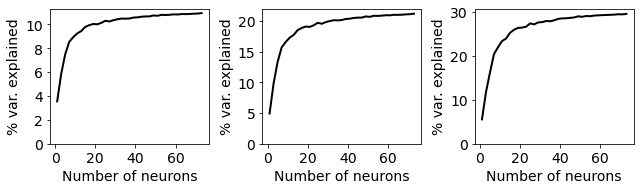

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9, 2.75), tight_layout=True)
for targ, ax in zip(TARGS, axs):
    ax.plot(ns, 100*np.array(r2_test_mns[targ]), c='k', lw=2)
#     ax.plot(ns, 100*np.array(r2_test_maxs[targ]), c='k', lw=2, ls='--')
    
    ax.set_ylim(bottom=0)
    
for ax in axs:
    set_plot(ax, x_label='Number of neurons', y_label=r'% var. explained', font_size=14)
    
fig.savefig('ms/fig_2e.svg')